In [1]:
import pandas as pd
import seaborn as sns
import statsmodels as sm
import statsmodels.api as sma
from patsy import dmatrices
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as npr
import math
import scipy.stats as ss
sns.set()

Here we examine whether and how epidemics went extinct over a maximum period of 730 days, starting with 1 infection and according to global social distancing associated with Scenarios A to E (as of May 28). We assume that between 0.1 and 0.5 infections are detected and assume 100% uptake of isolation among traced households and 100% adherence to isolation over time. 

Note that if an epidemic acquired 1000 or node infections it was ended as they were growing exponentially and would not go extinct.


In [2]:
scenA = pd.read_excel("../Data/Extinction Times/100_infection_scenA.xlsx", index_col = 0)
scenB = pd.read_excel("../Data/Extinction Times/100_infection_scenB.xlsx", index_col = 0)
#scenC = pd.read_excel("../Data/Extinction Times/100_infection_scenC.xlsx", index_col = 0)
#scenD = pd.read_excel("../Data/Extinction Times/100_infection_scenD.xlsx", index_col = 0)
scenE = pd.read_excel("../Data/Extinction Times/100_infection_scenE.xlsx", index_col = 0)

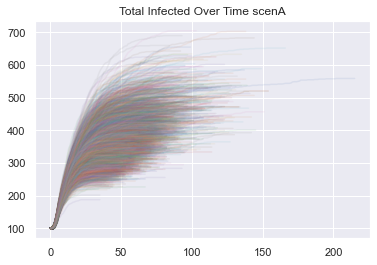

In [3]:
days_simulated_scenA = max(scenA.extinction_time)
infection_counts = [str(i) for i in range(days_simulated_scenA)]
infection_counts = scenA[infection_counts]

for _ in range(scenA.shape[0]):
    plt.plot(range(days_simulated_scenA), infection_counts.iloc[_], alpha = 0.1)
plt.title("Total Infected Over Time scenA")
plt.show()
#plt.savefig("../Figures/Extinction Times/Lockdown Relaxations/Infections_time_scenA_1inf.svg")

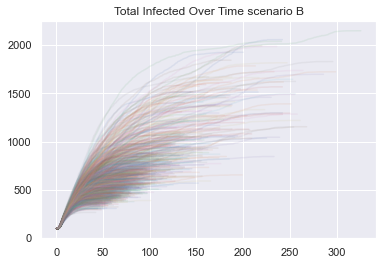

In [4]:
days_simulated_scenB = max(scenB.extinction_time)
infection_counts = [str(i) for i in range(days_simulated_scenB)]
infection_counts = scenB[infection_counts]


for _ in range(scenB.shape[0]):
    plt.plot(range(days_simulated_scenB), infection_counts.iloc[_], alpha = 0.1)
plt.title("Total Infected Over Time scenario B")
plt.show()
#plt.savefig("../Figures/Extinction Times/Lockdown Relaxations/Infections_time_scenB1inf.svg")

In [ ]:
days_simulated_scenC = max(scenC.extinction_time)
infection_counts = [str(i) for i in range(days_simulated_scenC)]
infection_counts = scenC[infection_counts]

for _ in range(scenC.shape[0]):
    plt.plot(range(days_simulated_scenC), infection_counts.iloc[_], alpha = 0.1)
plt.title("Total Infected Over Time ScenC")
#plt.savefig("../Figures/Extinction Times/Lockdown Relaxations/Infections_time_scenC_100inf.svg")

In [ ]:
days_simulated_scenD = max(scenD.extinction_time)
infection_counts = [str(i) for i in range(days_simulated_scenD)]
infection_counts = scenD[infection_counts]

for _ in range(scenD.shape[0]):
    plt.plot(range(days_simulated_scenD), infection_counts.iloc[_], alpha = 0.1)
plt.title("Total Infected Over Time scenD")
#plt.savefig("../Figures/Extinction Times/Lockdown Relaxations/Infections_time_scenD_100inf.svg")

In [6]:
days_simulated_scenE = max(scenE.extinction_time)
infection_counts = [str(i) for i in range(days_simulated_scenE)]
infection_counts = scenE[infection_counts]

for _ in range(scenE.shape[0]):
    plt.plot(range(days_simulated_scenE), infection_counts.iloc[_], alpha = 0.1)
#plt.xlim(0,220)
#plt.ylim(0,1200)    
plt.title("Total Infected Over Time scenE")
#plt.savefig("../Figures/Extinction Times/Lockdown Relaxations/Infections_time_scenE_100inf.svg")

Text(0.5, 1.0, 'Total Infected Over Time scenE')

col_0      count
end_state       
extinct     5000


col_0,count
end_state,
extinct,1.0


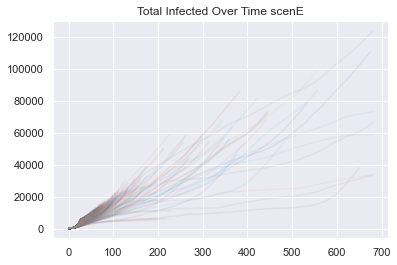

In [7]:
scenA['end_state'] = scenA['end_reason'] 
scenA['end_state']
scenA.loc[scenA.extinction_time == 15, ['end_state']] = 'extinct15'
scenA_15 = scenA.loc[scenA['extinction_time'] != 15]
reason_tab = pd.crosstab(index=scenA["end_state"],     
                      columns="count")
print(reason_tab)
reason_tab/reason_tab.sum()

Text(0, 0.5, 'Density')

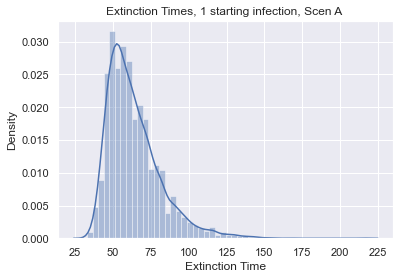

In [8]:
sns.distplot(scenA_15["extinction_time"])
plt.title("Extinction Times, 1 starting infection, Scen A ")
plt.xlabel("Extinction Time")
#plt.savefig('..\Figures\Extinction Times\Lockdown Relaxations\scenA.svg')
plt.ylabel("Density")

In [9]:
scenB['end_state'] = scenB['end_reason'] 
scenB.loc[scenB.extinction_time == 15, ['end_state']] = 'extinct15'
scenB_15 = scenB.loc[scenB['extinction_time'] != 15]
reason_tab_p2s1 = pd.crosstab(index=scenB["end_state"],     
                      columns="count")
print(reason_tab_p2s1)
reason_tab_p2s1/reason_tab_p2s1.sum()

col_0      count
end_state       
extinct     1000


col_0,count
end_state,
extinct,1.0


Text(0, 0.5, 'Density')

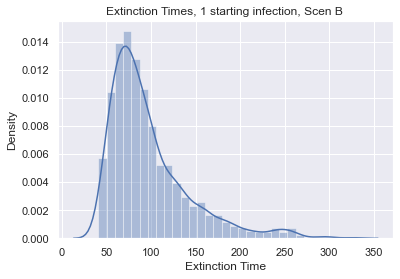

In [10]:
sns.distplot(scenB_15["extinction_time"])
plt.title("Extinction Times, 1 starting infection, Scen B ")
plt.xlabel("Extinction Time")
#plt.savefig('..\Figures\Extinction Times\Lockdown Relaxations\scenB.svg')
plt.ylabel("Density")

In [ ]:
scenC['end_state'] = scenC['end_reason'] 
scenC.loc[scenC.extinction_time == 15, ['end_state']] = 'extinct15'
scenC_15 = scenC.loc[scenC['extinction_time'] != 15]
reason_tab_p2s1 = pd.crosstab(index=scenC["end_state"],     
                      columns="count")
print(reason_tab_p2s1)
reason_tab_p2s1/reason_tab_p2s1.sum()

In [ ]:
sns.distplot(scenC_15["extinction_time"])
plt.title("Extinction Times, 1 starting infection, Scen C ")
plt.xlabel("Extinction Time")
#plt.savefig('..\Figures\Extinction Times\Lockdown Relaxations\scenC.svg')
plt.ylabel("Density")

In [ ]:
scenD['end_state'] = scenD['end_reason'] 
scenD.loc[scenD.extinction_time == 15, ['end_state']] = 'extinct15'
scenD_15 = scenD.loc[scenD['extinction_time'] != 15]
reason_tab_p2s1 = pd.crosstab(index=scenD["end_state"],     
                      columns="count")
print(reason_tab_p2s1)
reason_tab_p2s1/reason_tab_p2s1.sum()

In [ ]:
sns.distplot(scenD_15["extinction_time"])
plt.title("Extinction Times, 1 starting infection, Scen D ")
plt.xlabel("Extinction Time")
#plt.savefig('..\Figures\Extinction Times\Lockdown Relaxations\scenD.svg')
plt.ylabel("Density")

In [11]:
scenE['end_state'] = scenE['end_reason'] 
scenE.loc[scenE.extinction_time == 15, ['end_state']] = 'extinct15'
scenE_15 = scenE.loc[scenE['extinction_time'] != 15]
reason_tab_E = pd.crosstab(index=scenE["end_state"],     
                      columns="count")
print(reason_tab_E)
reason_tab_E/reason_tab_E.sum()

col_0        count
end_state         
extinct          6
more_than_X   4989
timed_out        5


col_0,count
end_state,
extinct,0.0012
more_than_X,0.9978
timed_out,0.0010


C:\Users\mfyles\OneDrive - The Alan Turing Institute\Documents\household-contact-tracing\tracing\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'Density')

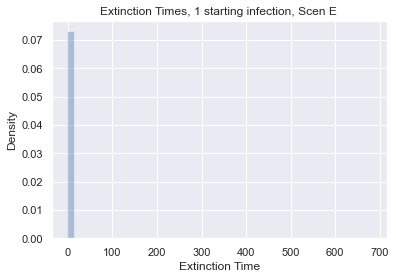

In [12]:
sns.distplot(scenE_15["extinction_time"])
plt.title("Extinction Times, 1 starting infection, Scen E ")
plt.xlabel("Extinction Time")
#plt.savefig('..\Figures\Extinction Times\Lockdown Relaxations\scenE.svg')
plt.ylabel("Density")

In [13]:
max(scenE_15["extinction_time"])

682

In [15]:
# Need to be clear that not quite comparing like with like because 
# in Scen E many more epidemics do not go extinct but keep growing exponentially

print(scenA_15.groupby('end_state').size())
print(scenE_15.groupby('end_state').size())

end_state
extinct    5000
dtype: int64
end_state
extinct           6
more_than_X    4989
timed_out         5
dtype: int64
